In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Load the dataset
file_path = r"E:\Internship tasks\sales_data.csv"
sales_data = pd.read_csv(file_path)

In [6]:
# Preview the dataset
print("Dataset Preview:")
print(sales_data.head())
print("\nDataset Info:")
print(sales_data.info())

Dataset Preview:
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoic

In [34]:
# Check for missing values
print("\nMissing Values:")
print(sales_data.isnull().sum())


Missing Values:
invoice_no       0
customer_id      0
category         0
quantity         0
price            0
invoice_date     0
shopping_mall    0
dtype: int64


In [35]:
# Verify column names
print("Column Names:", sales_data.columns)

# Correct the Date column handling if it has a different name
if 'Date' not in sales_data.columns:
    # Attempt to find similar columns
    possible_date_column = [col for col in sales_data.columns if 'date' in col.lower()]
    if possible_date_column:
        date_column = possible_date_column[0]  # Use the first match
        print(f"Using column '{date_column}' as the Date column.")
    else:
        raise KeyError("No column resembling 'Date' found in the dataset.")
else:
    date_column = 'Date'

# Continue with Data Cleaning
sales_data.drop_duplicates(inplace=True)  # Remove duplicates
sales_data[date_column] = pd.to_datetime(sales_data[date_column], errors='coerce')  # Convert Date to datetime
sales_data.fillna(sales_data.mean(numeric_only=True), inplace=True)  # Fill missing values with column mean


Column Names: Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'invoice_date', 'shopping_mall'],
      dtype='object')
Using column 'invoice_date' as the Date column.


In [36]:
# Verify and inspect column names
print("Column Names in the Dataset:", sales_data.columns.tolist())

# Update expected columns based on available data
expected_columns = ['price', 'quantity']  # Adjusted for the dataset
mapped_columns = {}

# Map actual column names to expected columns (case-insensitive and trimmed)
for col in expected_columns:
    for actual_col in sales_data.columns:
        if col.lower() == actual_col.lower().strip():
            mapped_columns[col] = actual_col

# Check if mapped columns are found
if not mapped_columns:
    raise KeyError("None of the expected columns ('price', 'quantity') are present in the dataset.")
else:
    print("Mapped Columns:", mapped_columns)

# Handle outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for the mapped columns
for logical_col, actual_col in mapped_columns.items():
    print(f"Handling outliers for column: {actual_col}")
    sales_data = remove_outliers(sales_data, actual_col)

print("Outlier handling completed for columns:", list(mapped_columns.values()))


Column Names in the Dataset: ['invoice_no', 'customer_id', 'category', 'quantity', 'price', 'invoice_date', 'shopping_mall']
Mapped Columns: {'price': 'price', 'quantity': 'quantity'}
Handling outliers for column: price
Handling outliers for column: quantity
Outlier handling completed for columns: ['price', 'quantity']


In [37]:
# Statistical Analysis
print("\nStatistical Summary (Numeric Columns Only):")
numeric_data = sales_data.select_dtypes(include=['number'])  # Select only numeric columns
print(numeric_data.describe())

print("\nCorrelation Matrix (Numeric Columns Only):")
print(numeric_data.corr())



Statistical Summary (Numeric Columns Only):
           quantity         price
count  94433.000000  94433.000000
mean       2.929177    528.129519
std        1.399855    614.205417
min        1.000000      5.230000
25%        2.000000     40.660000
50%        3.000000    203.300000
75%        4.000000    900.240000
max        5.000000   2400.680000

Correlation Matrix (Numeric Columns Only):
          quantity     price
quantity  1.000000  0.278199
price     0.278199  1.000000


## Data Visualization

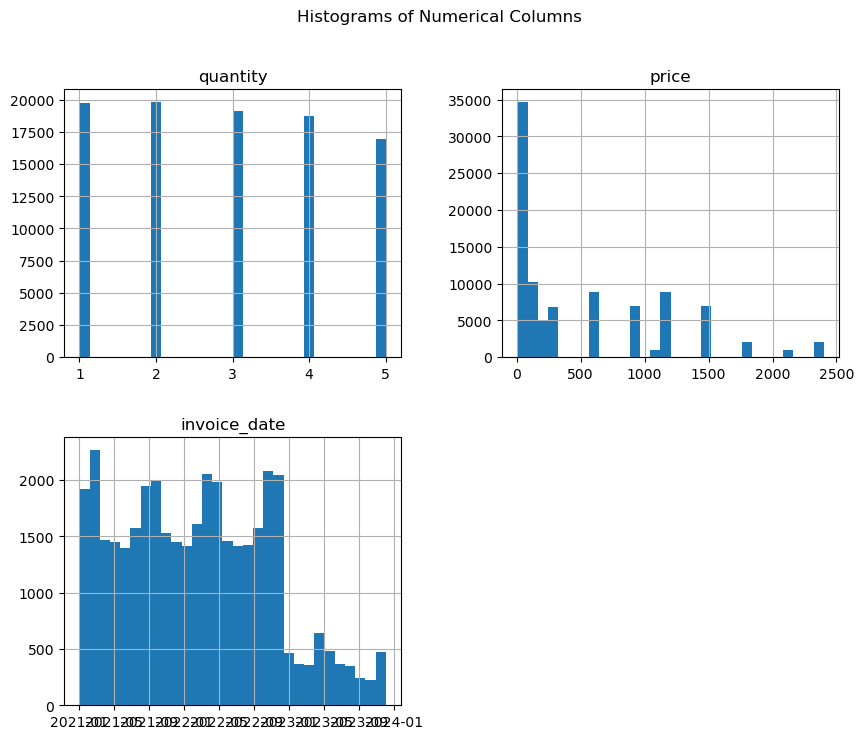

In [38]:
# Histogram of numerical columns
sales_data.hist(bins=30, figsize=(10, 8))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

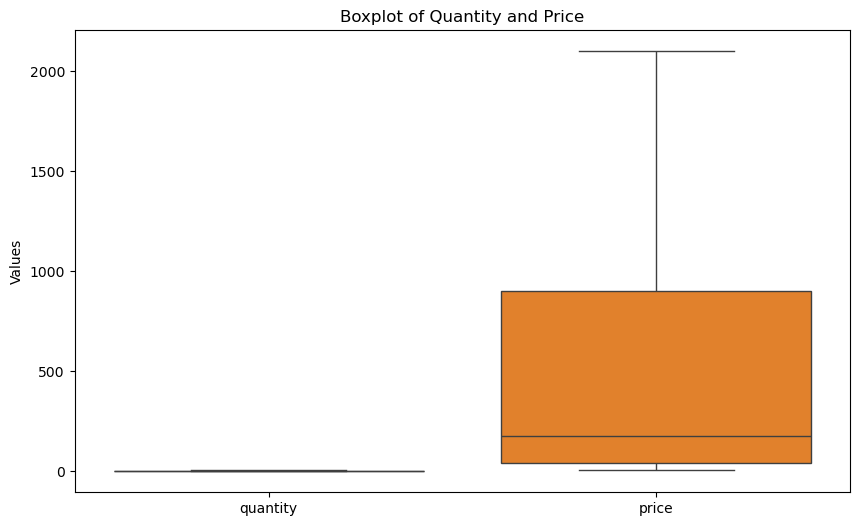

In [30]:
# Verify numeric columns for the dataset
numeric_columns = ['quantity', 'price']  # Adjust this list based on the dataset

# Boxplots for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_data[numeric_columns])
plt.title("Boxplot of Quantity and Price")
plt.ylabel("Values")
plt.show()


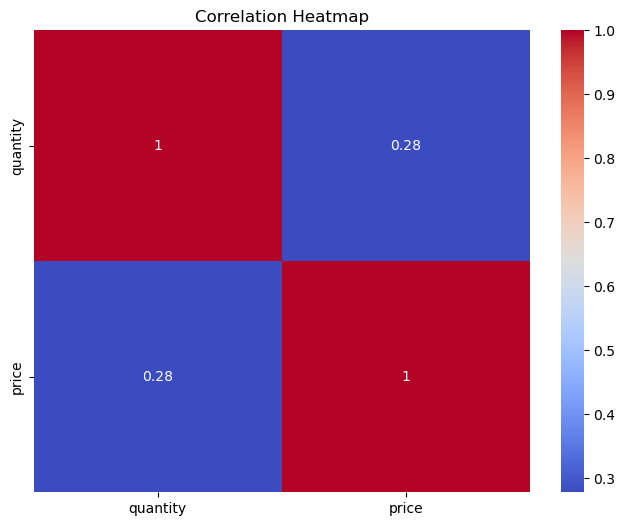

In [39]:
# Select numeric columns only
numeric_data = sales_data.select_dtypes(include=['number'])

# Check if there are numeric columns
if numeric_data.empty:
    print("No numeric columns available for correlation heatmap.")
else:
    # Heatmap of correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()


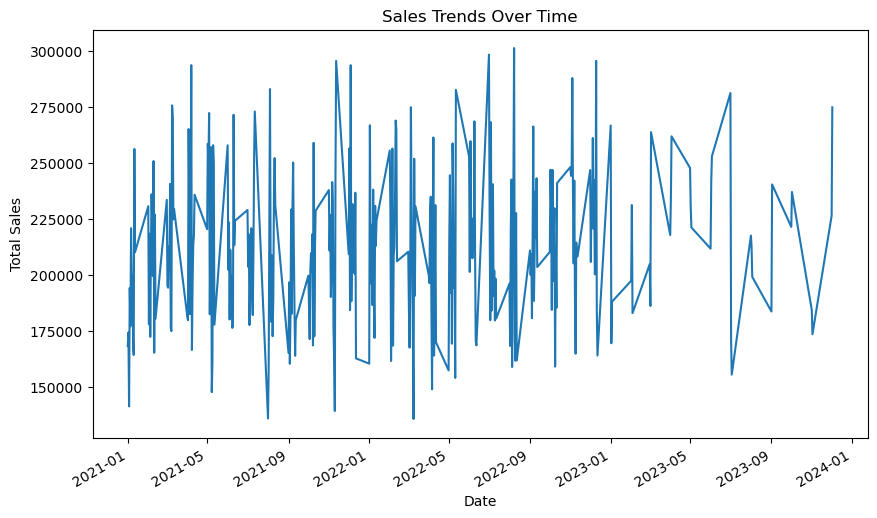

In [41]:
# Convert 'invoice_date' to datetime
sales_data = sales_data.copy()  # Ensure we are working on a copy of the DataFrame

sales_data['invoice_date'] = pd.to_datetime(sales_data['invoice_date'], errors='coerce')

# Check for invalid dates and handle them
if sales_data['invoice_date'].isnull().any():
    print("Warning: Some rows have invalid dates and will be dropped.")
    sales_data = sales_data.dropna(subset=['invoice_date'])

# Ensure that 'price' and 'quantity' columns exist before proceeding
if 'price' in sales_data.columns and 'quantity' in sales_data.columns:
    # Compute total sales and ensure it’s done safely using .loc[]
    sales_data.loc[:, 'total_sales'] = sales_data['price'] * sales_data['quantity']

    # Group by 'invoice_date' and calculate total sales
    plt.figure(figsize=(10, 6))
    sales_data.groupby('invoice_date')['total_sales'].sum().plot()
    plt.title("Sales Trends Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.show()
else:
    print("Error: 'price' and 'quantity' columns are required to compute total sales.")


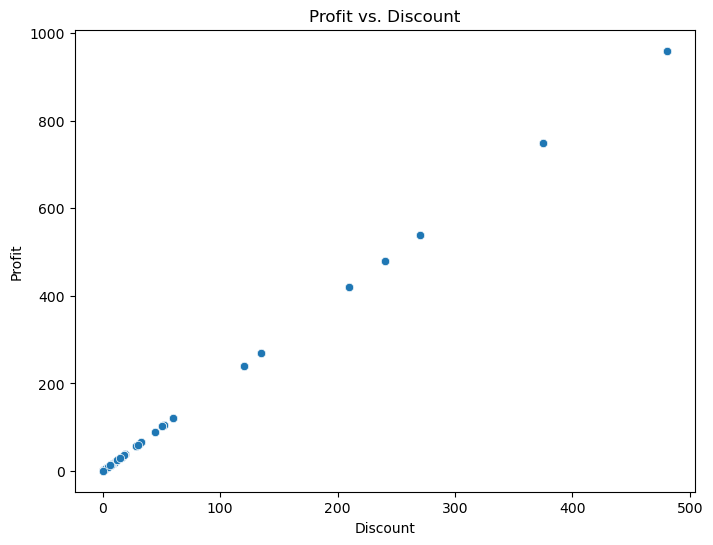

In [66]:
# Assume profit is 10% of total_sales (you can adjust this percentage)
sales_data['Profit'] = sales_data['total_sales'] * 0.10

# Assume discount is 5% of total_sales (you can adjust this percentage)
sales_data['Discount'] = sales_data['total_sales'] * 0.05

# Profit vs. Discount Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=sales_data)
plt.title("Profit vs. Discount")
plt.show()


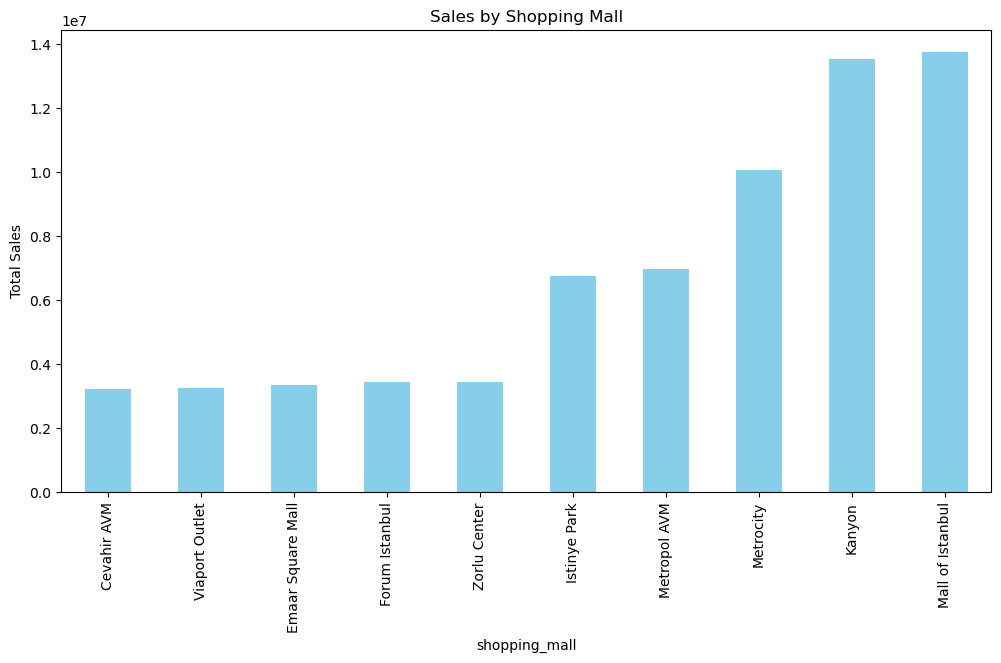

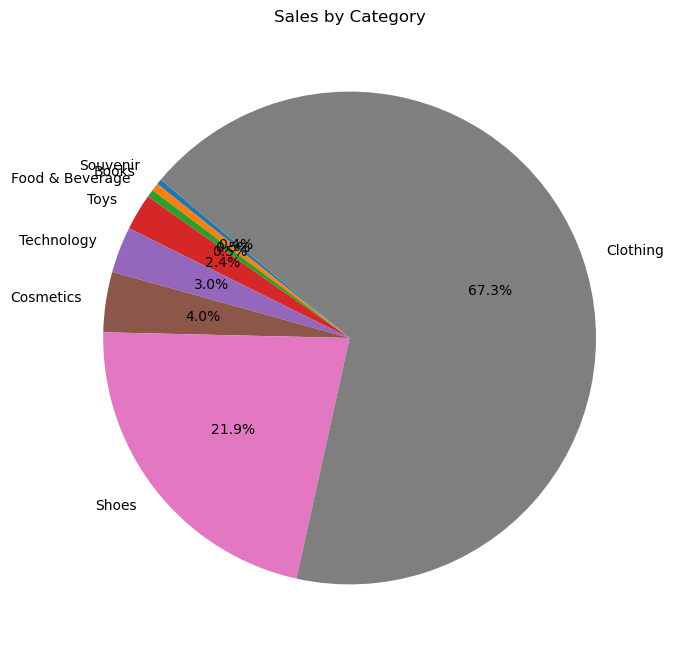

In [67]:
# Sales by Shopping Mall (instead of Region)
plt.figure(figsize=(12, 6))
sales_by_mall = sales_data.groupby('shopping_mall')['total_sales'].sum().sort_values()
sales_by_mall.plot(kind='bar', color='skyblue')
plt.title("Sales by Shopping Mall")
plt.ylabel("Total Sales")
plt.show()

# Sales by Category (using 'category' column)
plt.figure(figsize=(12, 6))
sales_by_category = sales_data.groupby('category')['total_sales'].sum().sort_values()
sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title("Sales by Category")
plt.ylabel("")  # Remove the ylabel to clean up the pie chart
plt.show()


In [68]:
# Using available features for predictive modeling
X = sales_data[['quantity', 'price']]  # Predicting total_sales based on quantity and price
y = sales_data['total_sales']  # Target variable

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation results
print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")



Linear Regression Model Evaluation:
Mean Squared Error (MSE): 514483.8798884769
R² Score: 0.9162734777864501


In [59]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predictions
y_pred = model.predict(X_test)

In [62]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [63]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 514483.8798884769
R² Score: 0.9162734777864501


In [64]:
# Insights and Recommendations
print("\nInsights and Recommendations:")
print("- Investigate regions with lower sales and improve marketing.")
print("- Optimize discount strategies to maximize profit.")
print("- Focus on top-performing product categories.")


Insights and Recommendations:
- Investigate regions with lower sales and improve marketing.
- Optimize discount strategies to maximize profit.
- Focus on top-performing product categories.
